In [1]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [24]:
import numpy as np

In [25]:
def getFromFile(file,info):
    cap = cv2.VideoCapture(file)
    ret, frame = cap.read()
    cap.release()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if(info):
        print(f'The shape of the image is {frame_rgb.shape}')
    return frame_rgb
def MaskImg(file,corners):
    image = getFromFile(file,0)
    mask = np.zeros(image.shape[:2], dtype=np.uint8)#CHIEDI
    mask_corners = np.array(corners)
    cv2.drawContours(mask, [mask_corners], -1, 255, -1)
#     plt.imshow(mask, cmap='gray')
    masked_image = cv2.bitwise_and(image,image,mask=mask)
    plt.imshow(masked_image)
    return masked_image
def getLimits(b,g,r,rangeWidth):
    arr = [[[b,g,r]]]
    color = np.uint8(arr)
    hsvColor = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)
    lowerLimit = [hsvColor[0][0][0]-rangeWidth,40,40]
    upperLimit = [hsvColor[0][0][0]+rangeWidth,255,255]
    return [lowerLimit,upperLimit]

The video contains 185 frames


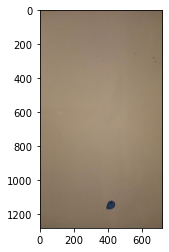

In [22]:
cap = cv2.VideoCapture("video1.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f'The video contains {n_frames} frames')

cap.set(cv2.CAP_PROP_POS_FRAMES, 184)
ret, frame = cap.read()
cap.release()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)

In [39]:
def correctFrame(file,frameNum,info):
    cap = cv2.VideoCapture(file)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frameNum)
    ret, frame = cap.read()
#     plt.imshow(frame)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if(info):
        print(f'The shape of the image is {frame_rgb.shape}')
    cap.release()
    return frame_rgb

The shape of the image is (1280, 720, 3)


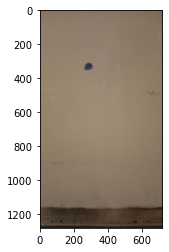

In [41]:
img = correctFrame("video1.mp4",10,1)
plt.imshow(img)

In [26]:
limits = getLimits(255,0,0,20)
lowerLimit = limits[0]
upperLimit = limits[1]

In [34]:
def MaskFrame(file,frameNum,corners):
    cap = cv2.VideoCapture(file)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frameNum)
    ret, frame = cap.read()
    cap.release()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    mask = np.zeros(frame_rgb.shape[:2], dtype=np.uint8)#CHIEDI
    mask_corners = np.array(corners)
    cv2.drawContours(mask, [mask_corners], -1, 255, -1)
#     plt.imshow(mask, cmap='gray')
    masked_image = cv2.bitwise_and(frame_rgb,frame_rgb,mask=mask)
    plt.imshow(masked_image)
    return masked_image

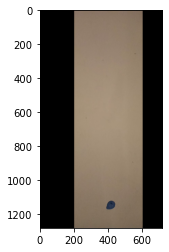

In [42]:
img=MaskFrame("video1.mp4",184,[[200, 0], [200, 1280], [600, 1280], [600, 0]])

In [43]:
hsv_image =  cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

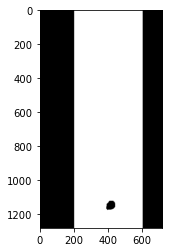

In [44]:
blue_regions = cv2.inRange(hsv_image, np.array(lowerLimit), np.array(upperLimit))#lower and upper limit are to be enclosed in an np array
plt.imshow(blue_regions, cmap='gray');

Centroid of green dot: (x, y) = (400.0, 639.5)


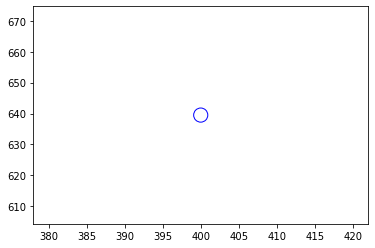

In [45]:
contours, _ = cv2.findContours(blue_regions, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)#CHIEDI
blue_dots_positions = []

for contour in contours:
#   print(f"area = {cv2.contourArea(contour)}")
  if cv2.contourArea(contour) > 100000: # Minimum contour area threshold
     M = cv2.moments(contour)
#      print(M)
     center_x = M["m10"] / M["m00"]
     center_y = M["m01"] / M["m00"]#CHIEDI
     print(f"Centroid of green dot: (x, y) = ({center_x:.1f}, {center_y:.1f})")
     plt.scatter(center_x, center_y, color='blue', marker='o', facecolor='none', s=200);#s is the size of the scattered contour
     blue_dots_positions.append([center_x, center_y])


Centroid of green dot: (x, y) = (278.8, 321.1)
Centroid of green dot: (x, y) = (281.8, 323.0)
Centroid of green dot: (x, y) = (283.9, 323.5)
Centroid of green dot: (x, y) = (284.6, 326.8)
Centroid of green dot: (x, y) = (284.7, 332.5)
Centroid of green dot: (x, y) = (284.7, 336.7)
Centroid of green dot: (x, y) = (284.1, 340.7)
Centroid of green dot: (x, y) = (283.1, 341.2)
Centroid of green dot: (x, y) = (284.0, 338.8)
Centroid of green dot: (x, y) = (285.0, 336.0)
Centroid of green dot: (x, y) = (283.9, 332.3)
Centroid of green dot: (x, y) = (283.0, 329.1)
Centroid of green dot: (x, y) = (282.5, 328.6)
Centroid of green dot: (x, y) = (280.4, 329.1)
Centroid of green dot: (x, y) = (279.3, 329.1)
Centroid of green dot: (x, y) = (279.3, 328.9)
Centroid of green dot: (x, y) = (279.2, 329.3)
Centroid of green dot: (x, y) = (278.3, 328.6)
Centroid of green dot: (x, y) = (279.4, 327.8)
Centroid of green dot: (x, y) = (281.3, 327.6)
Centroid of green dot: (x, y) = (281.2, 325.3)
Centroid of g

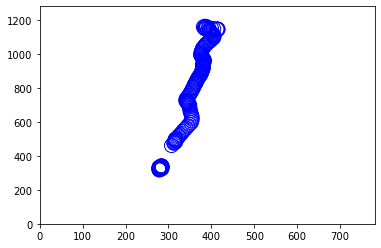

In [64]:
cap = cv2.VideoCapture("video1.mp4")
corners = [[200, 0], [200, 1280], [600, 1280], [600, 0]]

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

 # Define the codec and create VideoWriter object
    
outfilename = "tracked.mp4"   

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(outfilename, fourcc, fps, (frame_width, frame_height))

# print(f'Recording video for {record_duration_s} seconds with resolution {frame_width}x{frame_height}')

plt.axis([0,780,0,1280])

for frame_index in range(n_frames):
    ret, frame_rgb = cap.read()
#     frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    mask = np.zeros(frame_rgb.shape[:2], dtype=np.uint8)#CHIEDI
    mask_corners = np.array(corners)
    cv2.drawContours(mask, [mask_corners], -1, 255, -1)
#     plt.imshow(mask, cmap='gray')
    masked_image = cv2.bitwise_and(frame_rgb,frame_rgb,mask=mask)
    
    hsv_image =  cv2.cvtColor(frame_rgb, cv2.COLOR_BGR2HSV)
    
    blue_regions = cv2.inRange(hsv_image, np.array(lowerLimit), np.array(upperLimit))#lower and upper limit are to be enclosed in an np array
#     fig = plt.imshow(blue_regions, cmap='gray')

#     out.write(blue_regions)
    
    contours, _ = cv2.findContours(blue_regions, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)#CHIEDI
    blue_dots_positions = []


    
    for contour in contours:
#       print(f"area = {cv2.contourArea(contour)}")
      if cv2.contourArea(contour) > 1000: # Minimum contour area threshold
        M = cv2.moments(contour)
#         print(M)
        center_x = M["m10"] / M["m00"]
        center_y = M["m01"] / M["m00"]#CHIEDI
        print(f"Centroid of green dot: (x, y) = ({center_x:.1f}, {center_y:.1f})")
#         plt.xscale()
        plt.scatter(center_x, center_y, color='blue', marker='o', facecolor='none', s=200);#s is the size of the scattered contour
        blue_dots_positions.append([center_x, center_y])
    
cap.release()
out.release()
print(f'Video written to {outfilename}')


In [56]:
blue_regions.shape

(1280, 720)